In [1]:
library(GenomicFeatures)
library(ChIPseeker)
library(dplyr)
library(ggplot2)
library(tidyr)

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: AnnotationDbi

Loading 

In [2]:
pro_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/N4_filtered-annotated-peaks_minfoldch5_minus-2000bp-to-plus-500bp_111623.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)


In [5]:
TF<-"AT1G01060"
TF_c4_peak_gr <- pro_anno_table %>%
    filter(tf==!!TF,
           species == "Arabidopsis_thaliana_Col-0",
            n_cons_species_minfrac0 == 4) %>%
    makeGRangesFromDataFrame(seqnames.field = "peak_chr",start.field = "peak_start",end.field = "peak_end")

In [8]:
length(TF_c4_peak_gr)

[1] 1177

In [3]:
ATG_gr <- read.table("/clusterfs/jgi/groups/gentech/seqtech/plant_multidap_data/genomes/annotations/Arabidopsis_thaliana_Col-0_cds_primary.gff",header = F,stringsAsFactors = F) %>%
makeGRangesFromDataFrame(seqnames.field = "V1",start.field = "V4",end.field = "V5",strand.field = "V7")

k27ac_gr<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/reference/epimarks_bed/H3K27ac_leaf.peak.idr.hammock.gz",header = F,stringsAsFactors = F) %>%
    makeGRangesFromDataFrame(seqnames.field = "V1",start.field = "V2",end.field = "V3")


>> preparing start_site regions by gene... 2025-02-12 21:22:05
>> preparing tag matrix...  2025-02-12 21:22:05 
>> preparing start_site regions by gene... 2025-02-12 21:23:02
>> preparing tag matrix...  2025-02-12 21:23:02 
>> plotting figure...			 2025-02-12 21:23:41 


Warning message in plotAvgProf.internal(tagMatrix, xlim = xlim, xlab = xlab, ylab = ylab, :
“input is not a named list, set the name automatically to peak1 peak2”


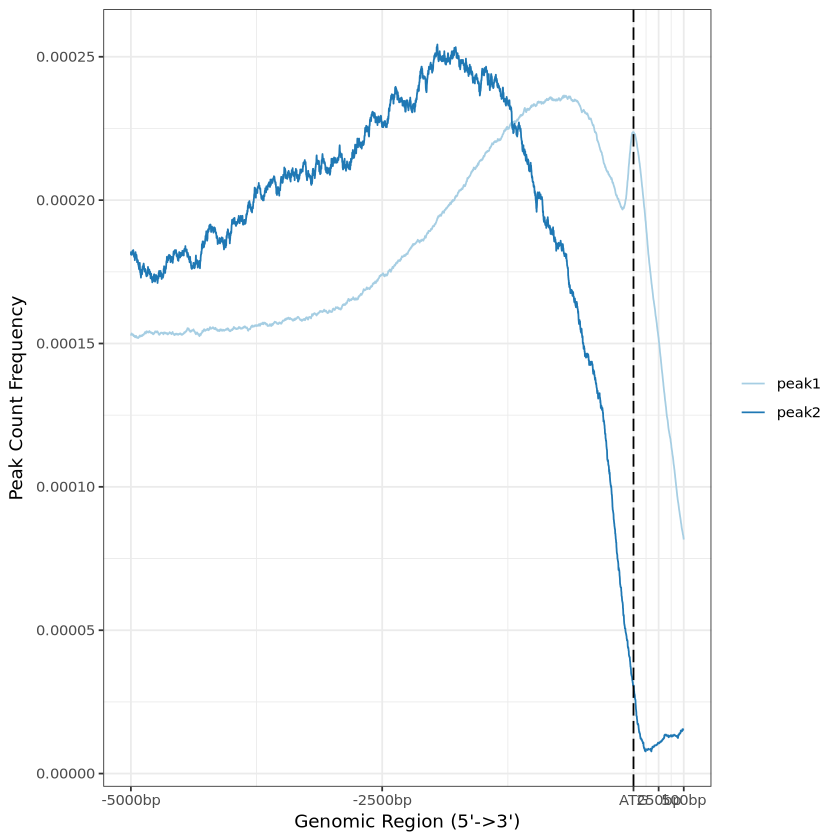

In [7]:
tagMatrixList <- lapply(list(k27ac_gr,TF_c4_peak_gr), 
                        getTagMatrix, 
                        windows=makeBioRegionFromGranges(ATG_gr,type = "start_site",upstream = 5000, downstream = 500,by="gene"))

# tagMatrix  <- getTagMatrix(k27ac_gr,
# windows = makeBioRegionFromGranges(ATG_gr,type = "start_site",upstream = 5000, downstream = 500,by="gene"))
plotAvgProf(tagMatrixList, xlim=c(-5000, 500),
xlab="Genomic Region (5'->3')", ylab = "Peak Count Frequency",origin_label = "ATG")

### Plot for the full gene

In [4]:
full_gene_anno_table<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/full_DAPseq_annotation/raw_data/Athaliana_promoter_gb_integrage.tsv",
header=T,sep="\t",comment.char="",quote="\"",stringsAsFactors=F)


In [5]:
TF<-"AT1G01060"
TF_c4_peak_gr <- full_gene_anno_table %>%
    filter(tf==!!TF,
           species == "Arabidopsis_thaliana_Col-0",
            n_cons_species_minfrac0 == 4) %>%
    makeGRangesFromDataFrame(seqnames.field = "peak_chr",start.field = "peak_start",end.field = "peak_end")

TF_c1_peak_gr <- full_gene_anno_table %>%
    filter(tf==!!TF,
           species == "Arabidopsis_thaliana_Col-0",
            n_cons_species_minfrac0 == 1) %>%
    makeGRangesFromDataFrame(seqnames.field = "peak_chr",start.field = "peak_start",end.field = "peak_end")

In [6]:
ATG_gr <- read.table("/clusterfs/jgi/groups/gentech/seqtech/plant_multidap_data/genomes/annotations/Arabidopsis_thaliana_Col-0_cds_primary.gff",header = F,stringsAsFactors = F) %>%
makeGRangesFromDataFrame(seqnames.field = "V1",start.field = "V4",end.field = "V5",strand.field = "V7")

k27ac_gr<- read.table("/clusterfs/jgi/groups/gentech/homes/romalley/reference/epimarks_bed/H3K27ac_leaf.peak.idr.hammock.gz",header = F,stringsAsFactors = F) %>%
    makeGRangesFromDataFrame(seqnames.field = "V1",start.field = "V2",end.field = "V3")


In [14]:
test_tag <- getTagMatrix(k27ac_gr,windows=makeBioRegionFromGranges(ATG_gr,upstream = 2000, downstream = 600,type="body",by="gene"),nbin = 800)

>> binning method is used...2025-02-13 10:57:06
>> preparing body regions by gene... 2025-02-13 10:57:06
>> preparing tag matrix by binning...  2025-02-13 10:57:06 
>> preparing matrix for body region with no flank extension... 2025-02-13 10:57:07
>> 10683 peaks(89.84106%), having lengths smaller than 800bp, are filtered... 2025-02-13 10:57:07


In [18]:
test_tag

1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0.3760000
1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0.0000000
1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0.0000000
0.00000000,0,0,0,0,0.0000000,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,0.9362671
0.00000000,0,0,0,0,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0.0000000
0.00000000,0,0,0,0,0.0000000,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,0.6515679
0.00000000,0,0,0,0,0.0000000,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,0.5770751
1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0.8126582
1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0.0000000
1.00000000,1,1,1,1,1.0000000,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0.0000000
0.00000000,0,0,0,0,0.0000000,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1.0000000


In [19]:
plotAvgProf(tagMatrixList, xlim=c(0, 800),
xlab="Genomic Region (5'->3')", ylab = "Peak Count Frequency",origin_label = "ATG")

>> plotting figure...			 2025-02-13 10:58:00 


Warning message in plotAvgProf.internal(tagMatrix, xlim = xlim, xlab = xlab, ylab = ylab, :
“input is not a named list, set the name automatically to peak1 peak2”


ERROR: Error in plotAvgProf.internal(tagMatrix, xlim = xlim, xlab = xlab, ylab = ylab, : please specify appropreate xcoordinations...


In [13]:
tagMatrixList <- lapply(list(k27ac_gr,TF_c4_peak_gr), 
                        getTagMatrix, 
                        windows=makeBioRegionFromGranges(ATG_gr,upstream = 2000, downstream = 600,by="gene",type="body"),
                        nbin=200)

# tagMatrix  <- getTagMatrix(k27ac_gr,
# windows = makeBioRegionFromGranges(ATG_gr,type = "start_site",upstream = 5000, downstream = 500,by="gene"))
plotAvgProf(tagMatrixList, #xlim=c(-2000, 600),
xlab="Genomic Region (5'->3')", ylab = "Peak Count Frequency",origin_label = "ATG")

>> binning method is used...2025-02-13 09:41:28
>> preparing body regions by gene... 2025-02-13 09:41:28
>> preparing tag matrix by binning...  2025-02-13 09:41:28 
>> preparing matrix for body region with no flank extension... 2025-02-13 09:41:28
>> 7232 peaks(60.81911%), having lengths smaller than 200bp, are filtered... 2025-02-13 09:41:28
>> binning method is used...2025-02-13 09:41:29
>> preparing body regions by gene... 2025-02-13 09:41:29
>> preparing tag matrix by binning...  2025-02-13 09:41:29 
>> preparing matrix for body region with no flank extension... 2025-02-13 09:41:30
>> 180 peaks(55.90062%), having lengths smaller than 200bp, are filtered... 2025-02-13 09:41:30
>> plotting figure...			 2025-02-13 09:41:30 


Warning message in plotAvgProf.internal(tagMatrix, xlim = xlim, xlab = xlab, ylab = ylab, :
“input is not a named list, set the name automatically to peak1 peak2”


ERROR: Error in plotAvgProf(tagMatrixList, xlab = "Genomic Region (5'->3')", : argument "xlim" is missing, with no default


Warning message in plotAvgProf.binning.internal(tagMatrix, xlab = xlab, ylab = ylab, :
“input is not a named list, set the name automatically to peak1 peak2”


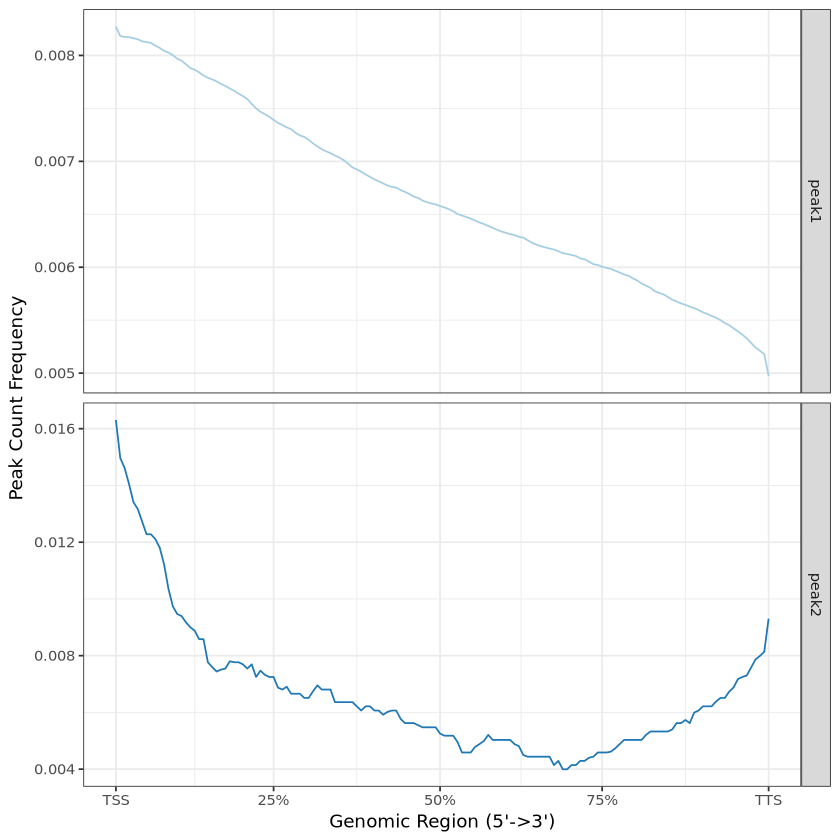

In [12]:
plotPeakProf(tagMatrixList)